In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [13]:
num_size = 1000
shape = [num_size, num_size]
N_patterns = 20 # number of pattern in one sequence
N_trial = 10 # number of trials
dt = 1
f = 0.5

In [19]:
alpha = 0.8 #saturation level
c = 1
g = 0.25
C1 = c
C2 = 2*c
C3 = 4*c
g12 = 0.8#2*g
g23 = 0.4#g
gk = 0.1#eps
g0 = 1#4*g#eta

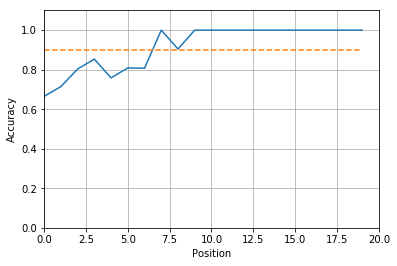

In [20]:
dt = 1
epochs = 10
Errs = np.zeros(N_patterns)
for n_trial in range(N_trial):
    
    Patterns = np.random.randint(0,2,size=(N_patterns, num_size))
    W1 = np.zeros(shape=shape)
    dW1 = np.zeros_like(W1)
    W2 = np.zeros(shape=shape)
    dW2 = np.zeros_like(W2)
    W3 = np.zeros(shape=shape)
    dW3 = np.zeros_like(W3)
    W_new = np.zeros(shape=shape)
    diag = np.diag_indices(num_size)
    for n in range(N_patterns):
        pattern = np.asarray(Patterns[n]).reshape(1,num_size)
        W_new = (pattern-f).T.dot(pattern-f)*(1 - alpha*np.abs(W1))/f/(1-f)
        W1 = W1 +  g0 * W_new
        for ts in range(int(1/dt)):
            W1 = W1 + (dt/C1) * (g12 * (W2 - W1))
            W2 = W2 + (dt/C2) * (g12 * (W1 - W2) + g23 * (W3 - W2))
            W3 = W3 + (dt/C3) * (g23 * (W2 - W3) - gk * W3)
            
        W1 = np.clip(W1, -1, 1)
        W2 = np.clip(W2, -1, 1)
        W3 = np.clip(W3, -1, 1)
        W1[diag] = 0
        W2[diag] = 0
        W3[diag] = 0
            

    Patterns_pred = Patterns
    for epoch in range(epochs):
        Patterns_pred = Patterns_pred.dot(W1)
        Patterns_pred = np.heaviside(Patterns_pred, 0)
    err = 1 - np.sum((np.abs(Patterns_pred - Patterns)), axis = 1)/num_size
    Errs = Errs + err

f1 = plt.figure()
plt.plot(Errs/N_trial, marker = 'o')
plt.plot(0.9*np.ones(N_patterns), '--')
plt.xlim([0, N_patterns])
plt.ylim([0,1.1])
plt.ylabel("Accuracy")
plt.xlabel("Position")
plt.grid()
plt.show(f1)